In [257]:
import pandas as pd
import numpy as np

In [258]:
df = pd.read_excel('Constant-elasticity.xlsx',sheet_name='Even better')

In [259]:
df.head()

,Price,Dem,Unnamed: 2,Log(P),Log(Dem)
0,3.0,7479,NaN,1.098612,8.919854
1,3.6,6304,NaN,1.280934,8.748940
2,40.0,94,NaN,3.688879,4.543295
3,21.0,349,NaN,3.044522,5.855072
4,4.0,7095,NaN,1.386294,8.867146


In [260]:
df2 = df[['Price','Dem']]

In [261]:
df2.head()

,Price,Dem
0,3.0,7479
1,3.6,6304
2,40.0,94
3,21.0,349
4,4.0,7095


In [262]:
import seaborn as sns

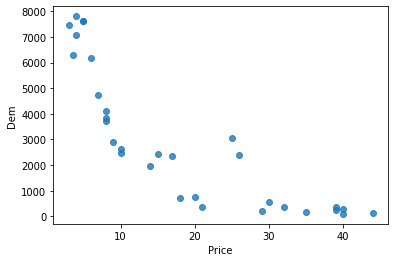

In [263]:
sns.regplot(x="Price", y="Dem", data=df2, fit_reg=False)

In [264]:
rho=df2['Price'].corr(df2['Dem'])
rhoSq = rho**2

In [265]:
rhoSq

0.7009593057946262

**Transformation**

In [266]:
df2['naturalLogPrice'] = np.log(df2['Price'])
df2['naturalLogDemand'] = np.log(df2['Dem'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [267]:
df2.head()

,Price,Dem,naturalLogPrice,naturalLogDemand
0,3.0,7479,1.098612,8.919854
1,3.6,6304,1.280934,8.748940
2,40.0,94,3.688879,4.543295
3,21.0,349,3.044522,5.855072
4,4.0,7095,1.386294,8.867146


In [268]:
import statsmodels.formula.api as smf
import pandas.util.testing as tm

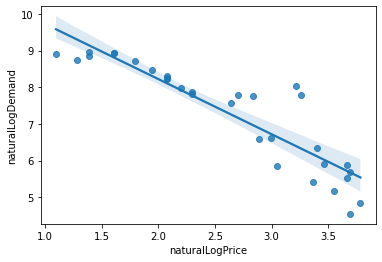

In [270]:
sns.regplot(x="naturalLogPrice", y="naturalLogDemand", data=df2, fit_reg=True)

In [271]:
model2 = smf.ols(formula='naturalLogDemand ~ naturalLogPrice', data=df2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:       naturalLogDemand   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     131.3
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           2.75e-12
Time:                        17:45:12   Log-Likelihood:                -27.513
No. Observations:                  31   AIC:                             59.03
Df Residuals:                      29   BIC:                             61.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.2382      0.360     

In [272]:
rho2=df2['naturalLogPrice'].corr(df2['naturalLogDemand'])
rhoSq2 = rho2**2

In [273]:
rhoSq2

0.819130824874572

Residuals

In [274]:
df4= pd.DataFrame()
df4['IV'] = df2['Price'].values.copy()
df4['prediction'] = results2.fittedvalues.copy()
df4['observed'] = df2['naturalLogDemand'].values.copy()
df4['res'] = df4['observed'] - df4['prediction']

In [275]:
df4['res'].head()

0   -0.663684
1   -0.560000
2   -1.138977
3   -0.797682
4   -0.283108
Name: res, dtype: float64

In [277]:
df4['res2'] = df4['res']*df4['res']

In [278]:
RMSEModel2 = sum(list(df4['res2']))/df2.shape[0]

In [279]:
np.sqrt(RMSEModel2)

0.5877636385915733

**Using sklearn**

In [280]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [281]:
regModel2 = linear_model.LinearRegression()

In [282]:
regModel2.fit(np.array(df2['naturalLogPrice']).reshape(-1,1), np.array(df2['naturalLogDemand']).reshape(-1,1))

LinearRegression()

In [283]:
print("Coefficient: \n", regModel2.coef_)

Coefficient: 
 [[-1.50612511]]


In [284]:
print("Intercept: \n", regModel2.intercept_)

Intercept: 
 [11.2381861]


In [285]:
df2['predSKLearnTransform'] = regModel2.predict(np.array(df2['naturalLogPrice']).reshape(-1,1))

In [286]:
print("RMSE:%.4f" % np.sqrt(mean_squared_error(np.array(df2['naturalLogDemand']).reshape(-1,1), np.array(df2['predSKLearnTransform']).reshape(-1,1))))
print("R squared: %.4f" % r2_score(np.array(df2['naturalLogDemand']).reshape(-1,1), np.array(df2['predSKLearnTransform']).reshape(-1,1)))

RMSE:0.5878
R squared: 0.8191
